### importing required librairies

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler



### importing the clean data

In [41]:

tsdata=pd.read_csv('./CleanDataForTimeSeries.csv')
tsdata = tsdata[['Date','nombre_pannes']]
tsdata.sample(10)

,Date,nombre_pannes
177,2019-09-12,10
687,2022-01-03,3
147,2019-07-27,7
194,2019-10-05,1
214,2019-11-04,5
656,2021-10-26,17
35,2019-02-17,10
229,2019-11-26,17
86,2019-05-01,5
383,2020-08-08,6


### plotting the data (because it looks good :3)

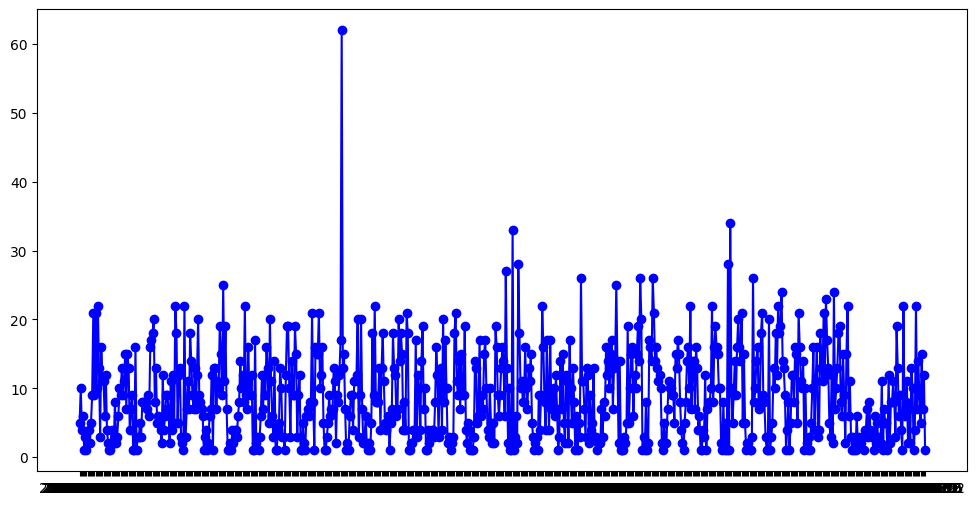

In [42]:
#plotting the data
plt.figure(figsize=(12, 6))
plt.plot(tsdata['Date'], tsdata['nombre_pannes'], marker='o', linestyle='-', color='b')

In [52]:
# Convert 'Date' column to ordinal values (numeric format)
tsdata['Date'] = pd.to_datetime(tsdata['Date']).apply(lambda x: x.toordinal())

# Define X and y
X = tsdata['Date'].values.reshape(-1, 1)  # Ensure X is reshaped as a 2D array
y = tsdata['nombre_pannes'].values.reshape(-1, 1)

### splitting the data

### creating and training the model

Epoch 1/50
19/19 [==============================] - 1s 867us/step - loss: 0.0234
Epoch 2/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 3/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 4/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0121
Epoch 5/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0120
Epoch 6/50
19/19 [==============================] - 0s 3ms/step - loss: 0.0119
Epoch 7/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 8/50
19/19 [==============================] - 0s 3ms/step - loss: 0.0118
Epoch 9/50
19/19 [==============================] - 0s 3ms/step - loss: 0.0118
Epoch 10/50
19/19 [==============================] - 0s 3ms/step - loss: 0.0118
Epoch 11/50
19/19 [==============================] - 0s 3ms/step - loss: 0.0117
Epoch 12/50
19/19 [==============================] - 0s 3ms/step - loss: 0.0117
Epoch 13/50
19/19 [============================

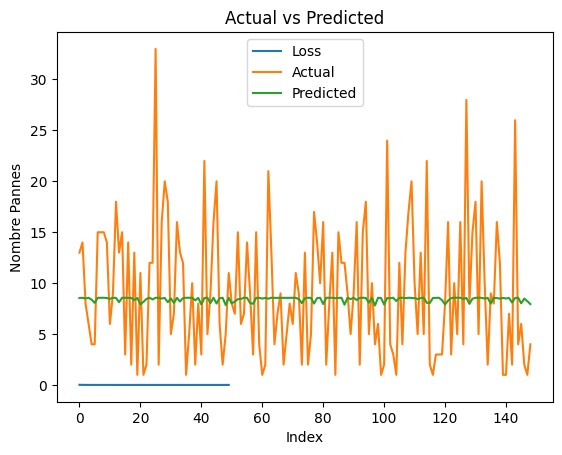

In [56]:
# Use MinMaxScaler for scaling
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit and transform X, y using the scaler
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshaping for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit the model
model_history = model.fit(X_train, y_train, epochs=50, batch_size=32)

# Plot loss curve
loss_per_epoch = model_history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch, label='Loss')

# Make predictions
y_pred_scaled = model.predict(X_test)

# Inverse transform the scaled predictions to original values
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_original = scaler_y.inverse_transform(y_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_original, y_pred)
print("MSE on test set:", mse)

# Plot actual vs predicted values
plt.plot(y_test_original, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted")
plt.xlabel("Index")
plt.ylabel("Nombre Pannes")
plt.show()


MSE on test set: 42.12643870597691


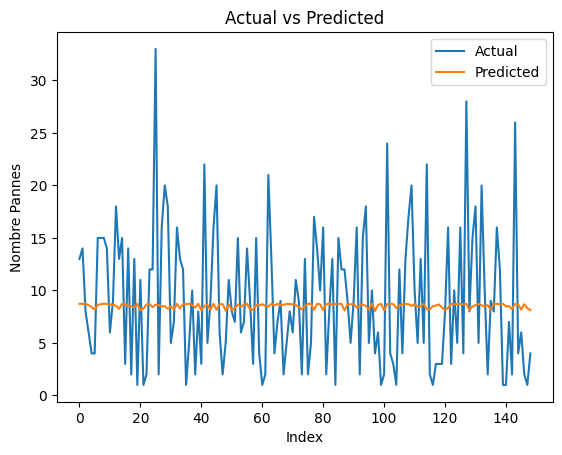

In [55]:
# Reverse the scaling for both actual and predicted values
y_test_rescaled = scaler_y.inverse_transform(y_test)
y_pred_rescaled = scaler_y.inverse_transform(y_pred)

# Calculate MSE on the rescaled test set
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
print("MSE on test set:", mse)

# Plot actual vs predicted values (rescaled)
plt.plot(y_test_rescaled, label='Actual')
plt.plot(y_pred_rescaled, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted")
plt.xlabel("Index")
plt.ylabel("Nombre Pannes")
plt.show()
